# [ Karate Dataset Classification with Logistic Regression ]
- train ratio : 0.1, 0.3, 0.5, 0.7
- metric : accuracy, precision, recall, F1-score
- dataset : Karate

# 1. Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ev = pd.read_csv('embedded_vector.csv')

In [3]:
data = ev[['X','Y','Color']]
data.columns = ['x1','x2','class']
data = data.sample(frac=1) # to shuffle

data.head()

,x1,x2,class
22,0.809701,0.846643,0
15,-0.010531,0.347128,0
2,0.497586,0.133329,1
25,0.133797,0.228465,0
4,1.084508,0.080561,1


In [4]:
data.shape

(34, 3)

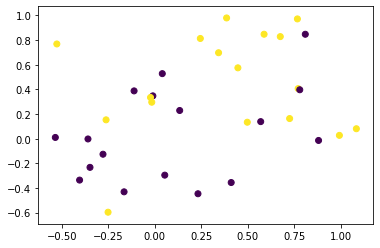

In [5]:
plt.scatter(data['x1'], data['x2'], c=data['class'])
plt.show()

In [6]:
data['class'].value_counts()

1    17
0    17
Name: class, dtype: int64

# 2. Define Functions

- 1) train_test_split
- 2) matrix multiplication
- 3) sigmoid
- 4) standard scaler
- 5) loss function

In [7]:
def train_test_split(data,test_ratio):
    data.iloc[:,[0,1]] = standard_scaler(data.iloc[:,[0,1]])
    test_index = np.random.choice(len(data),int(len(data)*test_ratio),replace=False)
    train = data[~data.index.isin(test_index)]
    test = data[data.index.isin(test_index)]
    
    train_X = np.array(train)[:,[0,1]]
    train_y = np.array(train)[:,[2]].flatten()
    test_X = np.array(test)[:,[0,1]]
    test_y = np.array(test)[:,[2]].flatten()
    return train_X,train_y, test_X,test_y

In [8]:
def mul(W,b,x):
    return np.dot(x,W)+b

def sigmoid(x):    
    k = 1 / (1 + np.exp(-x))
    return k[:,0]

In [9]:
def standard_scaler(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x-mean)/std

In [10]:
def loss_func(y_hat,y):
    total_loss = np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return -total_loss

### 3) MLP

# 3. Train Model

### Logistic Regression

In [11]:
def logreg(x,y,epoch,lr):
    W = np.random.rand(x.shape[1],1)
    b = np.random.rand(1)
    
    for ep in range(epoch+1):
        Z = mul(W,b,x)
        y_hat = sigmoid(Z)
        loss = loss_func(y_hat,y)
        dw = np.matmul(x.T,y_hat-y)/x.shape[0]
        db = np.sum(y_hat-y)
        
        W = W-lr*dw.reshape(-1,1)
        b = b-lr*db
        
        if ep % 10000 == 0:
            print('epoch :',ep,' loss :',loss)
            
    return W,b

# 4. Prediction

**TOO SMALL dataset! unstable model**

In [170]:
train_X_10, train_y_10, test_X_10, test_y_10 = train_test_split(data,0.9)
train_X_30, train_y_30, test_X_30, test_y_30 = train_test_split(data,0.7)
train_X_50, train_y_50, test_X_50, test_y_50 = train_test_split(data,0.5)
train_X_70, train_y_70, test_X_70, test_y_70 = train_test_split(data,0.3)

### 4 cases
- case 1) train 10%
- case 2) train 30%
- case 3) train 50%
- case 4) train 70%

### 1) weight & bias

In [171]:
W_10,b_10 = logreg(train_X_10,train_y_10,40000,0.001)

epoch : 0  loss : 0.6593308365741114
epoch : 10000  loss : 0.16243315108234851
epoch : 20000  loss : 0.08608784835902628
epoch : 30000  loss : 0.057835378260770044
epoch : 40000  loss : 0.043373910298135046


In [172]:
W_30,b_30 = logreg(train_X_30,train_y_30,40000,0.001)

epoch : 0  loss : 0.595785050592402
epoch : 10000  loss : 0.5277547221980337
epoch : 20000  loss : 0.5264002682692209
epoch : 30000  loss : 0.5260746776716059
epoch : 40000  loss : 0.5259887552029092


In [173]:
W_50,b_50 = logreg(train_X_50,train_y_50,40000,0.001)

epoch : 0  loss : 0.48855425918653145
epoch : 10000  loss : 0.29181192527506544
epoch : 20000  loss : 0.2689832066669257
epoch : 30000  loss : 0.25930977959826224
epoch : 40000  loss : 0.2540498366830823


In [174]:
W_70,b_70 = logreg(train_X_70,train_y_70,40000,0.001)

epoch : 0  loss : 0.6410069002890594
epoch : 10000  loss : 0.5650531338346519
epoch : 20000  loss : 0.5616843341978129
epoch : 30000  loss : 0.5614450045147054
epoch : 40000  loss : 0.5614244991790818


### 2) Prediction Result

In [175]:
def predict(test_X,W,b):
    preds = []
    for i in sigmoid(np.dot(test_X, W) + b):
        if i>0.5:
            preds.append(1)
        else:
            preds.append(0)
    return np.array(preds)

In [176]:
y_pred_10 = predict(test_X_10, W_10,b_10)
y_pred_30 = predict(test_X_30, W_30,b_30)
y_pred_50 = predict(test_X_50, W_50,b_50)
y_pred_70 = predict(test_X_70, W_70,b_70)

In [177]:
y_pred_50

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

### 3) Metric

In [178]:
def Metrics(pred,actual):
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(pred)):
        if pred[i]*actual[i]==1:
            TP +=1
        elif pred[i]>actual[i]:
            FP +=1
        elif pred[i]<actual[i]:
            FN +=1
        else:
            TN +=1
    
    accuracy = (TP+TN) / (TP+TN+FP+FN)
    precision = TP / (TP+FP)
    recall = TP / (TP+FN)
    F1_score = 2*(precision*recall)/(precision+recall)
    return accuracy,precision,recall,F1_score

In [179]:
print('Training Dataset 10%')
acc, pre, rec, f1 = Metrics(y_pred_10,test_y_10)
print('accuarcy :', np.round(acc,3))
print('precision :', np.round(pre,3))
print('recall :', np.round(rec,3))
print('f1-score :', np.round(f1,3))

Training Dataset 10%
accuarcy : 0.667
precision : 0.692
recall : 0.6
f1-score : 0.643


In [180]:
print('Training Dataset 30%')
acc, pre, rec, f1 = Metrics(y_pred_30,test_y_30)
print('accuarcy :', np.round(acc,3))
print('precision :', np.round(pre,3))
print('recall :', np.round(rec,3))
print('f1-score :', np.round(f1,3))

Training Dataset 30%
accuarcy : 0.478
precision : 0.421
recall : 0.889
f1-score : 0.571


In [181]:
print('Training Dataset 50%')
acc, pre, rec, f1 = Metrics(y_pred_50,test_y_50)
print('accuarcy :', np.round(acc,3))
print('precision :', np.round(pre,3))
print('recall :', np.round(rec,3))
print('f1-score :', np.round(f1,3))

Training Dataset 50%
accuarcy : 0.647
precision : 0.7
recall : 0.7
f1-score : 0.7


In [182]:
print('Training Dataset 70%')
acc, pre, rec, f1 = Metrics(y_pred_70,test_y_70)
print('accuarcy :', np.round(acc,3))
print('precision :', np.round(pre,3))
print('recall :', np.round(rec,3))
print('f1-score :', np.round(f1,3))

Training Dataset 70%
accuarcy : 0.8
precision : 0.75
recall : 0.75
f1-score : 0.75
